In [185]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv('../data/mouse_viral_study.csv')

In [187]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


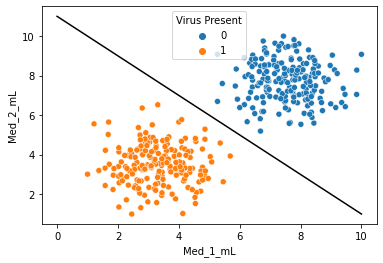

In [188]:
sns.scatterplot(data=df, x='Med_1_mL', y ='Med_2_mL' , hue='Virus Present')

x = np.linspace(0,10,100)

m = -1
b= 11
y = m*x +b
plt.plot(x,y,'black')

In [189]:
from sklearn.svm import SVC

In [190]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

In [191]:
model = SVC(kernel='linear', C=1000)

In [192]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [193]:
from svm_margin_plot import plot_svm_boundary

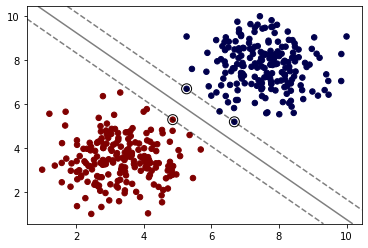

In [194]:
plot_svm_boundary(model,X,y)

In [195]:
model = SVC(kernel='linear', C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

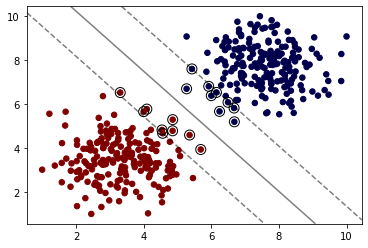

In [196]:
plot_svm_boundary(model,X,y)

In [197]:
model = SVC(kernel='rbf', C=1 , gamma=0.9)
model.fit(X,y)

SVC(C=1, gamma=0.9)

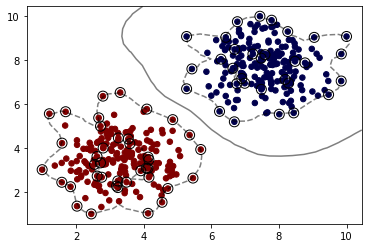

In [198]:
plot_svm_boundary(model,X,y)

In [199]:
model = SVC(kernel='poly', C=0.5, degree=4)

In [200]:
model.fit(X,y)

SVC(C=0.5, degree=4, kernel='poly')

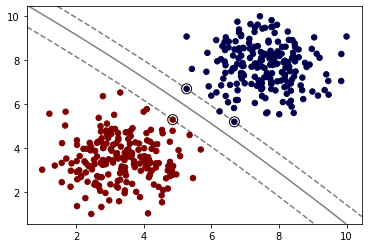

In [201]:
plot_svm_boundary(model,X,y)

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
SVM = SVC()

In [204]:
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf']}

In [205]:
grid = GridSearchCV(SVM, param_grid)

In [206]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [207]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [208]:
##############################################################

In [209]:
df = pd.read_csv('../data/cement_slump.csv')

In [210]:
df.head(10)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
5,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.0,55.0,25.21
6,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
7,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
8,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,51.0,32.71
9,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.0,51.0,38.46


<AxesSubplot:>

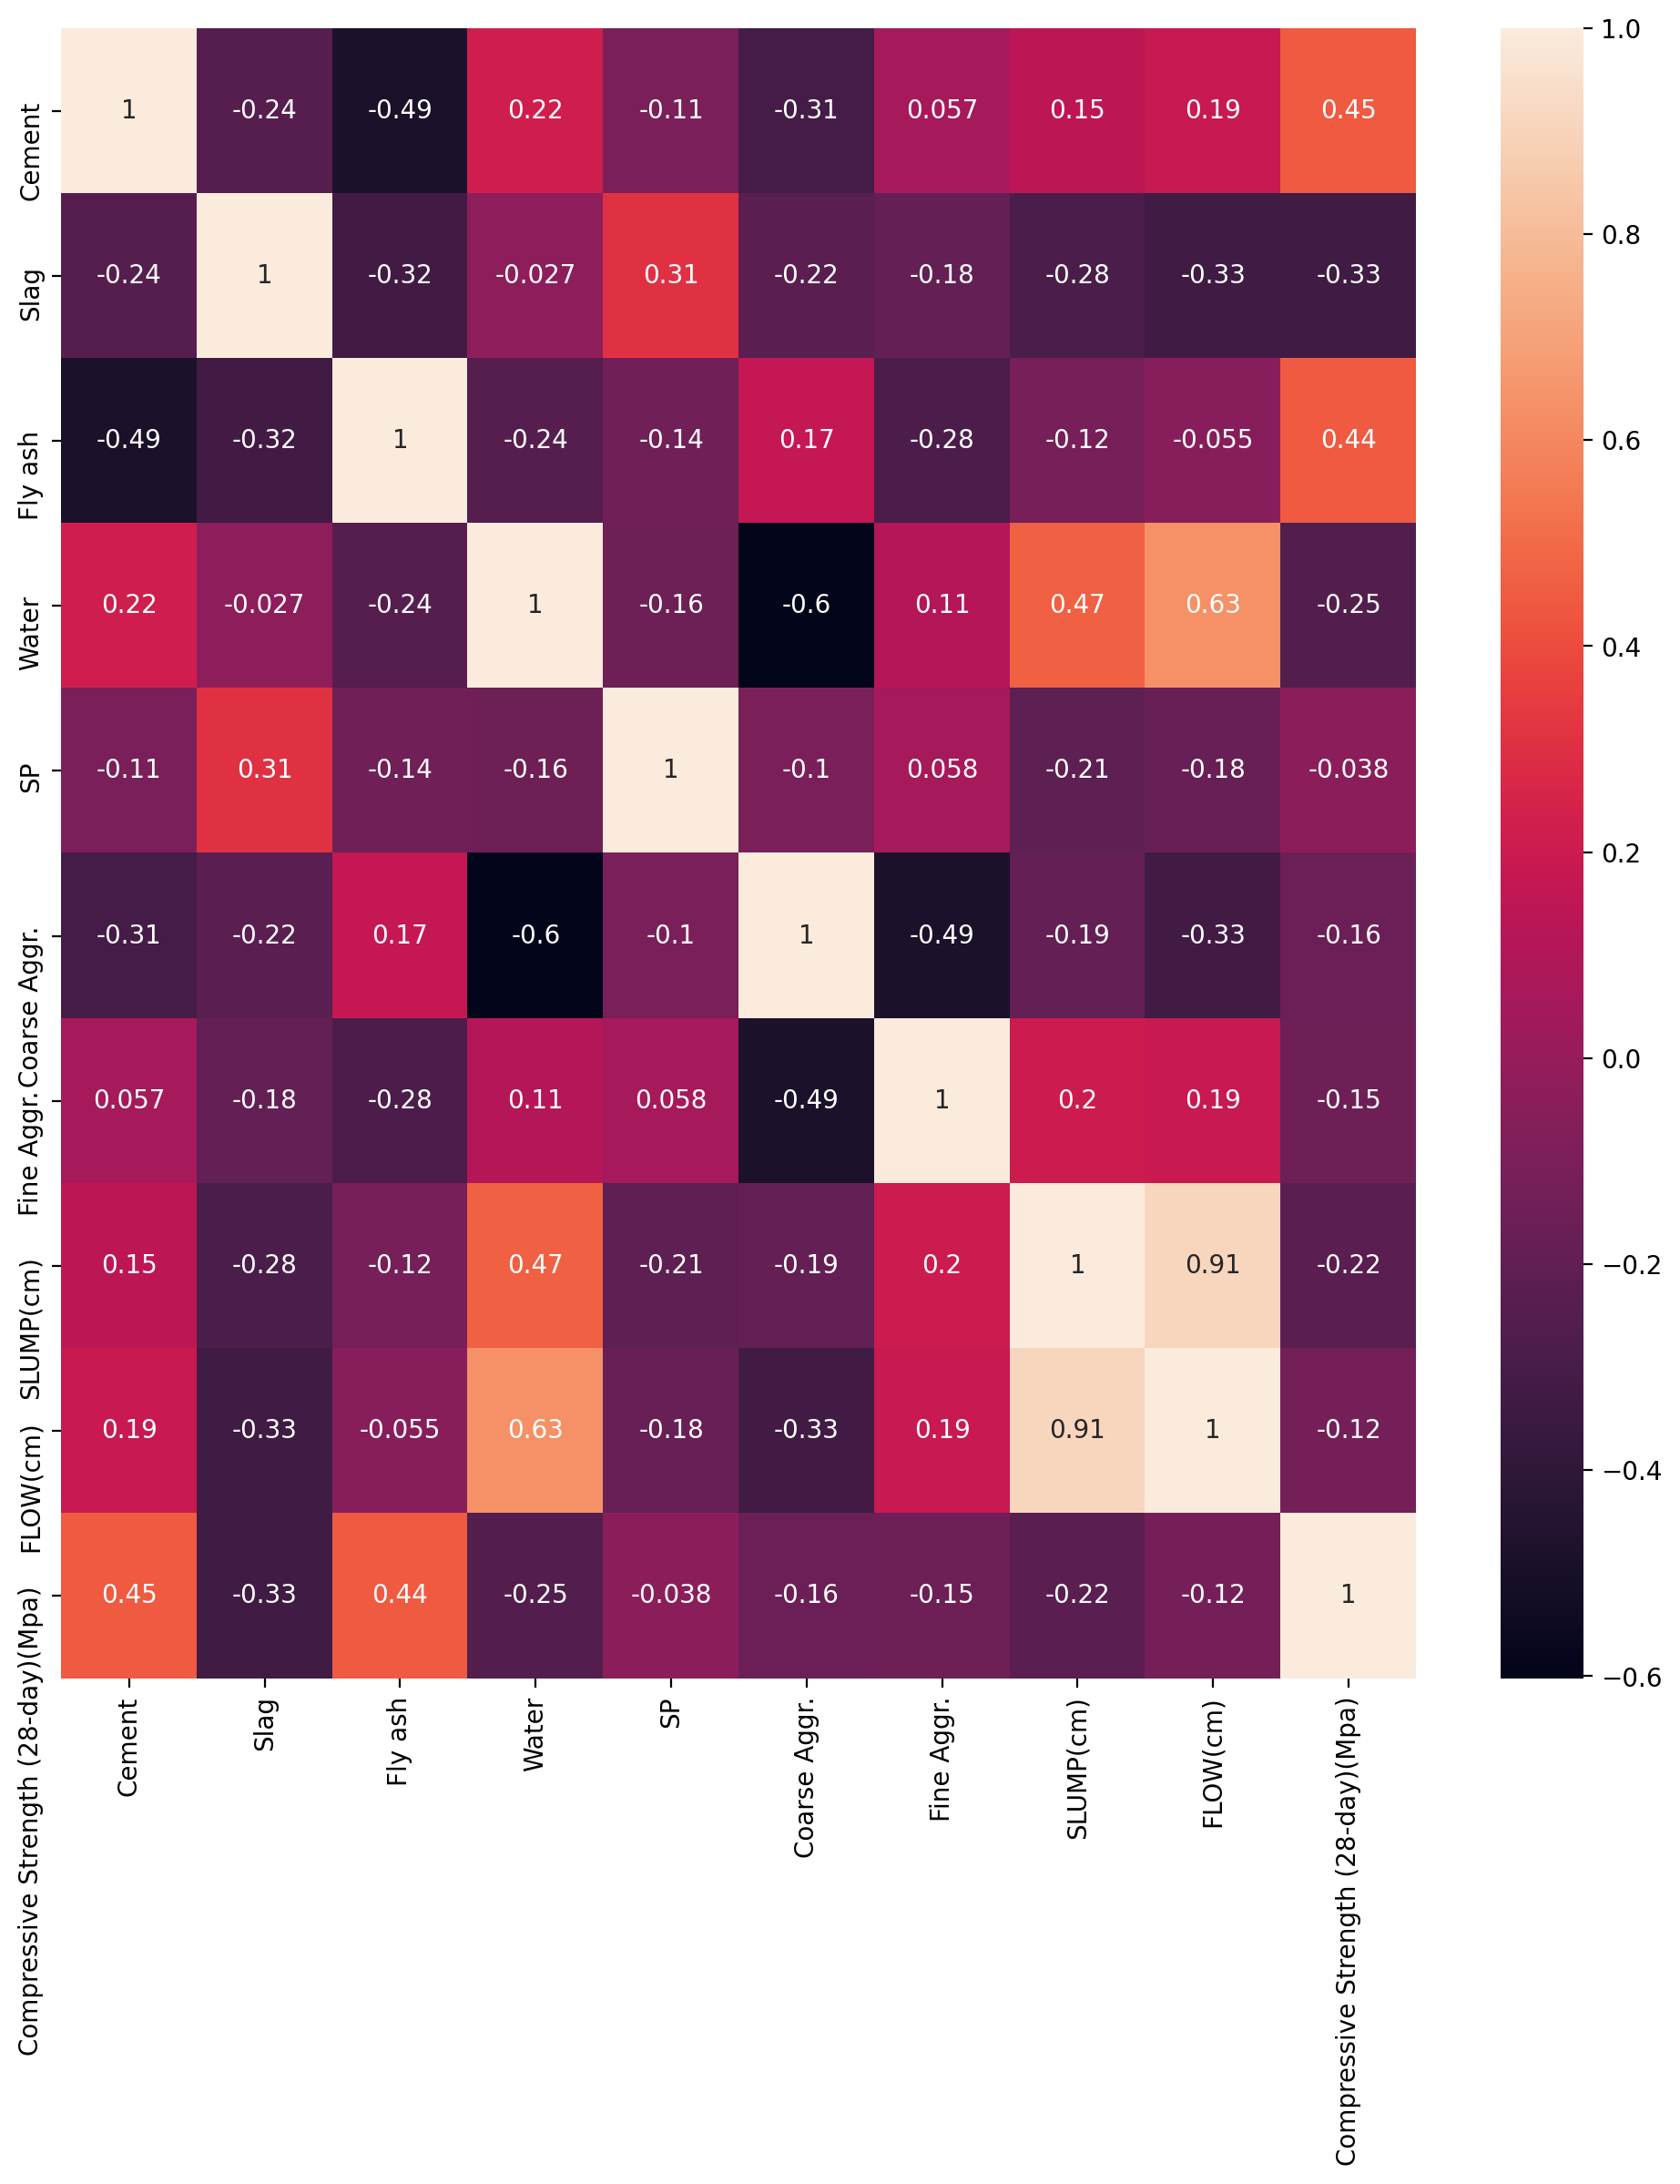

In [211]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(df.corr(), annot=True)

In [212]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [213]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [214]:
y = df['Compressive Strength (28-day)(Mpa)']

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler = StandardScaler()

In [219]:
scal_x_train = scaler.fit_transform(X_train)

In [220]:
scal_x_test = scaler.transform(X_test)

In [221]:
from sklearn.svm import SVR, LinearSVR

In [222]:
base_model = SVR()

In [223]:
base_model.fit(scal_x_train,y_train)

SVR()

In [224]:
base_pred = base_model.predict(scal_x_test)

In [225]:
from sklearn.metrics  import mean_squared_error,mean_absolute_error

In [226]:
np.sqrt(mean_squared_error(y_test,base_pred))

5.424378610369369

In [227]:
mean_absolute_error(y_test,base_pred)

4.417093894049603

In [228]:
param_grid = {'C': [0.001,0.01,0.1,0.5,1], 'kernel':['linear','rbf','poly'], 'gamma': ['scale','auto'], 'degree':[2,3,4], 'epsilon':[0,0.01,0.1,0.5,1,2,3]}

In [229]:
svr = SVR()

In [230]:
grid = GridSearchCV(svr,param_grid)

In [231]:
grid.fit(scal_x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [232]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [233]:
grid_pred = grid.predict(scal_x_test)

In [234]:
mean_absolute_error(y_test,grid_pred)

1.9647881220332484

In [235]:
np.sqrt(mean_squared_error(y_test,grid_pred))

2.4628287763938

In [236]:
####################################################
#excercise

In [237]:
df = pd.read_csv('../data/wine_fraud.csv')

In [238]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [239]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

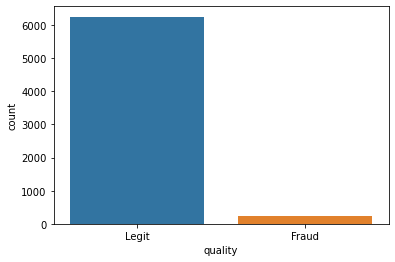

In [240]:
sns.countplot(data=df, x='quality')

<AxesSubplot:xlabel='quality', ylabel='count'>

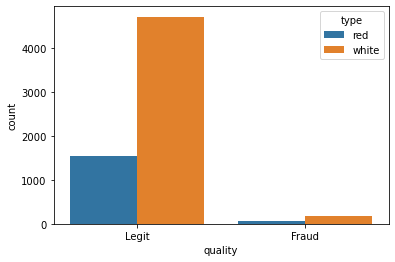

In [241]:
sns.countplot(data=df, x='quality', hue='type')

In [242]:
red_wine = df[df['type']=='red']
white_wine = df[df['type']=='white']

In [243]:
len(red_wine[red_wine['quality']=='Fraud'])/len(red_wine)

0.039399624765478425

In [244]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

<AxesSubplot:>

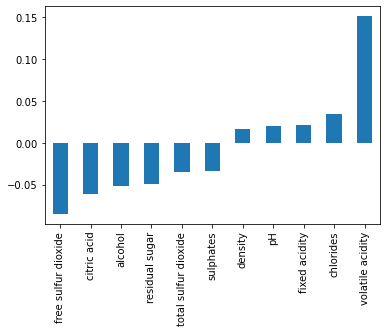

In [245]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

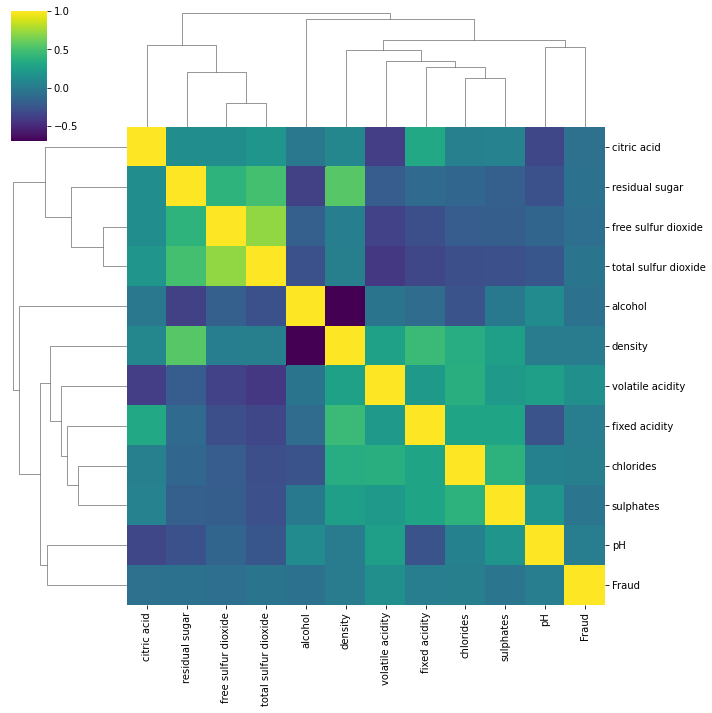

In [246]:
sns.clustermap(df.corr(), cmap='viridis')

In [247]:
df = df.drop('Fraud',axis=1)

In [248]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [249]:
X = df.drop('quality',axis=1)

In [250]:
y = df['quality']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=88)

In [252]:
scaler = StandardScaler()

In [253]:
scaled_train = scaler.fit_transform(X_train)

In [254]:
scaled_test = scaler.transform(X_test)

In [255]:
svc = SVC(class_weight='balanced')

In [256]:
param_grid = {'C':[0.0001,0.001,0.01,0.1,0.5,1]}

In [257]:
grid = GridSearchCV(svc,param_grid)

In [258]:
grid.fit(scaled_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1]})

In [259]:
grid.best_params_

{'C': 1}

In [260]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [261]:
preds = grid.predict(scaled_test)

In [262]:
confusion_matrix(y_test,preds)

array([[ 17,  11],
       [ 81, 541]], dtype=int64)

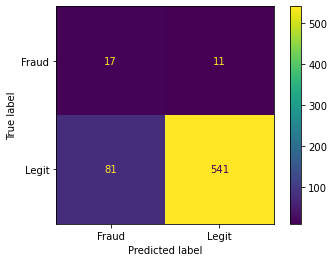

In [263]:
plot_confusion_matrix(grid,scaled_test,y_test)

In [264]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       Fraud       0.17      0.61      0.27        28
       Legit       0.98      0.87      0.92       622

    accuracy                           0.86       650
   macro avg       0.58      0.74      0.60       650
weighted avg       0.95      0.86      0.89       650

